`library(readr)
houses  <-  read_tsv('AmesHousing_1.txt')`

**Task**

Write a function that takes in a vector of values (including strings) and returns the mode of that vector. 

**Answer**

`library(dplyr)`

`compute_mode <- function(vector)` `{
    counts_df  <-  tibble(vector) %>% 
        group_by(vector) %>% 
        summarise(frequency=n()) %>% 
        arrange(desc(frequency)) 
    counts_df$vector[1]}`

`computed_mode  <-  compute_mode(houses$`Land Slope`)`

We learned that the mode is ideal for ordinal data represented using words. The mode is also a good choice for nominal data. Let's consider the `Roof Style` variable, which is measured on a nominal scale and describes the roof type of a house.

We cannot compute the mean for this variable because the values are words. Even if they were coded as numbers, it'd be completely wrong to compute the mean because in the case of nominal variables the numbers describe qualities, not quantities.

We could compute the mean for ordinal variables if the values are numbers. This reasoning doesn't extend to nominal variables, because they don't describe quantities like ordinal variables do.

Because the `Roof Style` variable is nominal, there's also no inherent order of the values in the distribution. This means that we cannot sort the values in an ascending or descending order. The first step in computing the median is to sort the values in ascending order, which means we cannot compute the median for the `Roof Style` variable.

**Task**

Write a new function, `compute_mode_table()`, based on the function `compute_mode()` to return both the mode of a vector and the frequency vector containing the count for each unique value in the vector.

**Answer**

`compute_mode_table <- function(vector) {
    counts_df  <-  tibble(vector) %>% 
        group_by(vector) %>% 
        summarise(frequency = n()) %>% 
        arrange(desc(frequency)) 
    list('mode' = counts_df$vector[1], 'values' = counts_df$frequency)}`

`mode <- compute_mode_table(houses$`Roof Style`)$mode`

`value_counts  <-  compute_mode_table(houses$`Roof Style`)$values`

There are some cases where computing the mean and the median is possible and correct, but the mode is preferred nonetheless. This is sometimes the case for discrete variables.

There are distributions that can have more than one mode. If the distribution had only one mode, we'd call it **unimodal** (the prefix "uni-" means "only one"). For two mode, we'd call it **bimodal**. When a distribution has more than two modes, we say that the distribution is **multimodal**.

We can also have cases when there is no mode at all.

`[1,1,2,2,3,3,4,4]`

Each unique value occurs twice in the distribution above, so there's no value (or values) that occurs more often than others. For this reason, this distribution doesn't have a mode.

Distributions without a mode are often specific to continuous variables. It's quite rare to find two identical values in a continuous distribution

The workaround is to organize the continuous variable in a grouped frequency table, and select for the mode the midpoint of the class interval (the bin) with the highest frequency.

**Task**

`library(dplyr)`

`houses %>% 
    mutate(intervals_group = cut(SalePrice, 
                                 breaks = seq(0,800000,100000))) %>%
    group_by(intervals_group) %>% 
    summarize(frequency = n())`
    
Find the mode of above Frequency table

**Answer**

`mode  <-  150000
mean  <-  mean(houses$SalePrice)
median  <-  median(houses$SalePrice)`

When we plot a histogram or a kernel density plot to visualize the shape of a distribution, the mode will always be the peak of the distribution.

`library(ggplot2)`

`ggplot(data = houses,
    aes(x = SalePrice)) +
    geom_density(alpha = 0.1, 
                 color='blue', 
                 fill='blue') +
    geom_vline(aes(xintercept = 150000, 
                   color = 'Mode'), 
               size = 1.2 ) +
    geom_vline(aes(xintercept = median(SalePrice), 
                   color = 'Median'), 
               size = 1.2 ) +
    geom_vline(aes(xintercept = mean(SalePrice), 
                   color = 'Mean'), 
               size = 1.2 ) +
    scale_y_continuous(labels = scales::comma) +
    scale_x_continuous(labels = scales::comma, 
                       lim = c(min(houses$SalePrice), 
                       max(houses$SalePrice))) +
    scale_colour_manual(values = c("Mode" = "green", 
                                   "Median" = "black", 
                                   "Mean" = "orange"), 
                        name = "") +
    theme_bw() + 
    theme(legend.position='top') +
    xlab("Sale Price") + 
    ylab("Density")`

* We plot a vertical line to indicate the position of our estimated mode of 150,000 
* We use the functions `scale_x_continuous()` and `scale_y_continuous()` to avoid the scientific notation of `ggplot2` (In this case, we can use the parameter `lim` to directly set the axis boundaries rather than use `xlim()` function.).
* We use the function `scale_colour_manual()` to rename the elements of the legend.
* We use the function `theme()` with the parameter `legend.position` to move the legend on top of the plot.

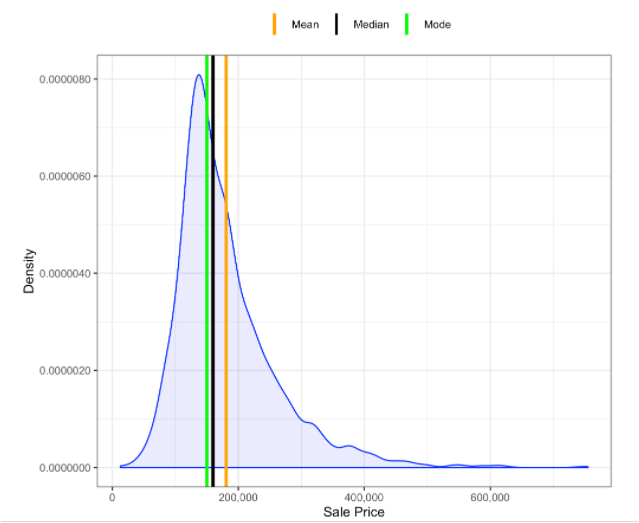

We can notice that the color in the `geom_vline()` function is not a name of color but just a label. This is due to the use of function `scale_colour_manual()`. Actually, when we use this function, we indicate to R that the color will be defined manually. Hence, we assign the real color name to the label in the `scale_colour_manual()` function. This becomes useful when we have more than one vertical line with different colors.

For a left-skewed distribution, the direction is simply reversed: the mean is positioned to the left of the median, and the median to the left of the mode. 

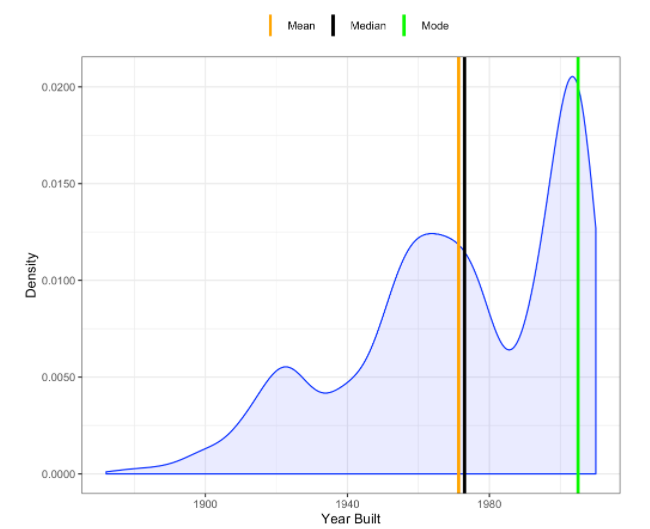

The location of the mean, median, and mode are also predictable for symmetrical distributions.

The mean and the median are always equal for any perfectly symmetrical distribution.

Although the mean and the median have a constant location for every symmetrical distribution (no matter the shape), the location of the mode can change. The mode is where the peak is, so for a normal distribution the mode will be at the center, right where the mean and the median are.

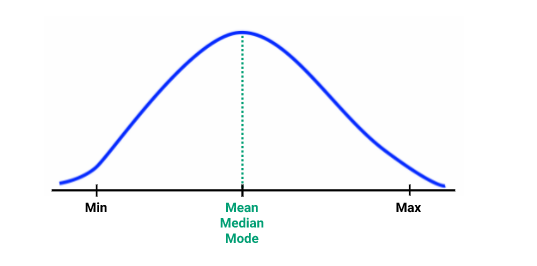

It's possible to have a symmetrical distribution with more than one peak, which means that the mode won't be at the center:

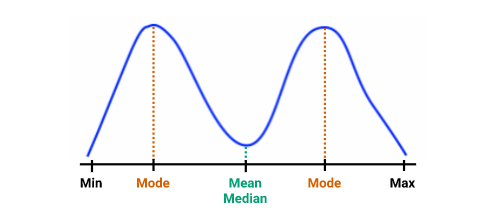

A uniform distribution doesn't have any peaks, which means it doesn't have any mode:

In practice, we almost never work with perfectly symmetrical distributions, but many distributions are approximately symmetrical nonetheless. This means that the patterns outlined above are still relevant for practical purposes.

**Task**

Plot a kernel density plot `Mo Sold` distribution

**Answer**

`library(ggplot2)`

`ggplot(data = houses,
    aes(x = `Mo Sold`)) +
    geom_density(alpha = 0.1, 
                 color='blue', 
                 fill='blue') +
    geom_vline(aes(xintercept = compute_mode(`Mo Sold`),  # using function we wrote compute_mode
                   color = 'Mode'), 
               size = 1.2 ) +
    geom_vline(aes(xintercept = median(`Mo Sold`), 
                   color = 'Median'), 
               size = 1.2 ) +
    geom_vline(aes(xintercept = mean(`Mo Sold`), 
                   color = 'Mean'), 
               size = 1.2 ) +
    scale_y_continuous(labels = scales::comma) +
    xlim(1,12)+
    scale_colour_manual(values = c("Mode" = "green", 
                                   "Median" = "black", 
                                   "Mean" = "orange"), 
                        name = "") +
    theme_bw() + 
    theme(legend.position='top') +
    xlab("Mo Sold") + 
    ylab("Density")`